In [63]:
# Author: Chris S.
# Edit: MirkoM
# Creation Date 26.12.2021
# Last Edit -> git log


In [64]:
import numpy as np
import pandas as pd
import scipy.io
import math
import os
from scipy.stats import t       #t-Verteitung
from scipy.stats import f       #f-Verteilung
from scipy.stats import norm    #Standartnormalverteilung
from scipy.stats import chi2    #Chi-Quadrat-Verteilung
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import summary_table
from statsmodels.formula.api import ols
import statsmodels.api as sm

'''Mit diesem Backend wird die Ausgabe von Plot-Befehlen in Frontends wie dem Jupyter-Notebook inline angezeigt, direkt unter der Codezelle, die sie erzeugt hat. Die resultierenden Plots werden dann auch im Notizbuchdokument gespeichert.'''
%matplotlib inline
import csv

# Funktionen
def openmat(fp):
    if not os.path.isfile(fp):
        print('File does not exist.')
    else:
        mat = scipy.io.whosmat(fp) #whosmat gibt eine Liste mit Variablen aus
        print(mat)
        return(mat)


## 01: Einfache Regression 1.Grades

In [65]:
"""Matlab file laden"""

filepath1 = r'data\ScherfestigkeitSchweissen.mat'
mat = openmat(filepath1)
"""Vorgegebene Werte aus Aufgabe"""
data = scipy.io.loadmat(filepath1)['data']

"""Dataframe erstellen"""
df = pd.DataFrame(data, columns=['Scherfestigkeit', 'Durchmesser'])
#print(df)

''' CSV Datei laden mit Header in Zeile 0'''
# df_header_0 = pd.read_csv('data/src/sample_header.csv', header=0)

''' Mit Index
df_header_index_col = pd.read_csv('data/src/sample_header_index.csv', index_col=0)
print(df_header_index_col)
#         a   b   c   d
# ONE    11  12  13  14
# TWO    21  22  23  24
# THREE  31  32  33  34

print(df_header_index_col.index)
# Index(['ONE', 'TWO', 'THREE'], dtype='object')
'''
#
""""""

[('data', (10, 2), 'double')]


''

In [66]:

"""Lineare Regression"""
Gamma = 0.95    #Anpassen!
alpha = 1-Gamma

'''Regeressionsfunktion 1.Grades - Ordinary least Squares<funktion y von x - im Beispiel ist die Scherfestigkeit eine Funktion vom Durchmesser'''
model = ols("Scherfestigkeit ~ I(Durchmesser)", df).fit()
print(model.summary())
st, data, ss2 = summary_table(model, alpha)

                            OLS Regression Results                            
Dep. Variable:        Scherfestigkeit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.418e+05
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.77e-18
Time:                        11:51:51   Log-Likelihood:                 32.545
No. Observations:                  10   AIC:                            -61.09
Df Residuals:                       8   BIC:                            -60.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0222      0.007     -3.

C:\Users\Mirko\.conda\envs\p37_ws21-p\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## 02: Kubisches Regressionsmodell

Therme sind nur dann signifikant (wichtig), wenn P>|t| kleiner als 5% sind

In [67]:
"""Matlab file laden"""
fp2 = (r'data\Diodenstrom.mat')
'''Mache aus mehrdimensionalen Vektoren/Matrix einen 1Dimensionalen Vektor'''
ud = np.ravel(scipy.io.loadmat(fp2)['ud'].T)
id = np.ravel(scipy.io.loadmat(fp2)['id'].T)

"""Dataframe erstellen"""
df_a = pd.DataFrame(ud, columns = ['ud'])
df_a['id'] = id


In [68]:

"""kubisches Regressionsmodell"""
Gamma = 0.99
alpha = 1-Gamma

#Regeressionsfunktion 3.Grades
model_a = ols("id ~ I(ud) + I(ud**2)+ I(ud**3)", df_a).fit()
print(model_a.summary())
st_a, data_a, ss2_a = summary_table(model_a, alpha)

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1245.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.15e-15
Time:                        11:51:51   Log-Likelihood:                -9.3311
No. Observations:                  16   AIC:                             26.66
Df Residuals:                      12   BIC:                             29.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1923.1342    237.915     -8.083      0.0

C:\Users\Mirko\.conda\envs\p37_ws21-p\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


## 03: Plotten von Regressionsmodell und Prognosebereiche

In [69]:

"""Dataframe erstellen"""
df_a = pd.DataFrame(ud, columns = ['ud'])
df_a['id'] = id

"""kubisches Regressionsmodell"""
Gamma = 0.99    #Anpassen!
alpha = 1-Gamma

#Regeressionsfunktion 3.Grades
model_a = ols("id ~ I(ud) + I(ud**2)+ I(ud**3)", df_a).fit()
print(model_a.summary())
st_a, data_a, ss2_a = summary_table(model_a, alpha)

#erweitern des Datenframes um Prognosebereiche etc.
df_a['Fit'] = data_a[:,2]
df_a['Conll'] = data_a[:,4].T  #Conficence lower-limit
df_a['Conul'] = data_a[:,5].T  #Confidence upper-limit
df_a['Predll'] = data_a[:,6].T #Prediction lower-limit
df_a['Predul'] = data_a[:,7].T #Prediction upper-limit
df_a

                            OLS Regression Results                            
Dep. Variable:                     id   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1245.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.15e-15
Time:                        11:51:51   Log-Likelihood:                -9.3311
No. Observations:                  16   AIC:                             26.66
Df Residuals:                      12   BIC:                             29.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1923.1342    237.915     -8.083      0.0

C:\Users\Mirko\.conda\envs\p37_ws21-p\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,ud,id,Fit,Conll,Conul,Predll,Predul
0,0.45,0.255196,-0.181257,-1.412055,1.049541,-2.144218,1.781705
1,0.46,0.620263,0.540539,-0.257252,1.338331,-1.184229,2.265308
2,0.47,0.563901,0.982682,0.323288,1.642076,-0.682597,2.647961
3,0.48,0.599139,1.243909,0.572164,1.915654,-0.426299,2.914118
4,0.49,1.346004,1.422958,0.734640,2.111276,-0.253984,3.099901
5,0.50,1.556730,1.618567,0.952093,2.285041,-0.049529,3.286662
6,0.51,1.986831,1.929472,1.309994,2.548950,0.279591,3.579353
7,0.52,2.803908,2.454412,1.873370,3.035455,0.818575,4.090250
8,0.53,3.908101,3.292125,2.711082,3.873168,1.656287,4.927963
9,0.54,4.920227,4.541348,3.921870,5.160825,2.891467,6.191229


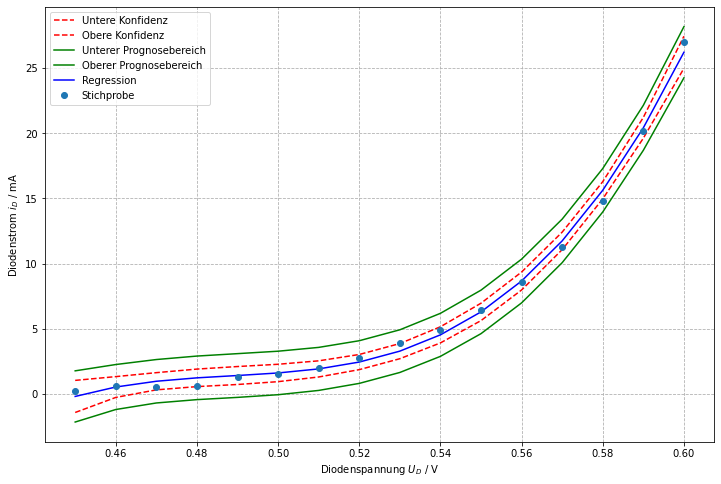

In [70]:

plt.figure(figsize=(12,8))
plt.plot(df_a['ud'],df_a['Conll'],'r--')
plt.plot(df_a['ud'],df_a['Conul'],'r--')
plt.plot(df_a['ud'],df_a['Predll'],'g')
plt.plot(df_a['ud'],df_a['Predul'],'g')
plt.plot(df_a['ud'],df_a['Fit'],'b')
plt.plot(df_a['ud'],df_a['id'], 'o')
plt.xlabel("Diodenspannung ${U_D}$ / V")
plt.ylabel("Diodenstrom ${i_D}$ / mA")
plt.title("")
plt.legend(['Untere Konfidenz', 'Obere Konfidenz', 'Unterer Prognosebereich', 'Oberer Prognosebereich','Regression', 'Stichprobe'])
plt.grid(True, which= 'both', axis='both', linestyle='--')

## 04: Plotten von Residuen

[('data', (10, 2), 'double')]


C:\Users\Mirko\.conda\envs\p37_ws21-p\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


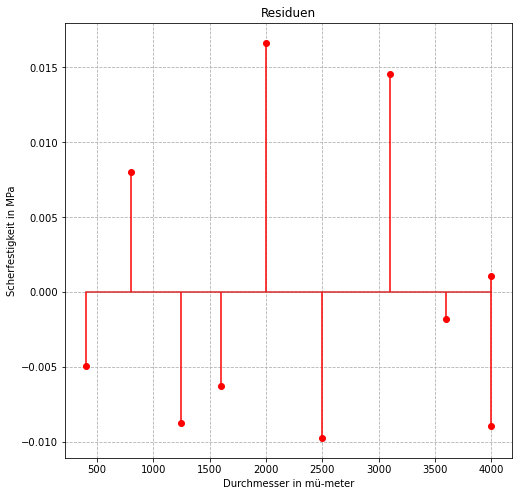

In [71]:
"""Matlab file laden"""
fp = r'data\ScherfestigkeitSchweissen.mat'
mat = openmat(fp) #whosmat gibt eine Liste mit Variablen aus

"""Vorgegebene Werte aus Aufgabe"""
data = scipy.io.loadmat(fp)['data']

"""Dataframe erstellen"""
df = pd.DataFrame(data, columns=['Scherfestigkeit', 'Durchmesser'])

"""Residuen plotten (model.resid)"""
plt.figure(figsize=(8,8))
plt.stem(df['Durchmesser'], model.resid, 'r', use_line_collection=True, markerfmt='ro')
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Durchmesser in mü-meter')
plt.ylabel('Scherfestigkeit in MPa')
plt.title('Residuen');  
